<a href="https://colab.research.google.com/github/ZeeshanAhmed95/MNIST-Classification-Keras/blob/main/MNIST_Classification_using_Sklearn_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Approach :**
1. **Load all the libraries and Data**
2. **Data Preparations**
3. **Data Visualization**
4. **Analysis** -
      - ***Sklearn***
           - Perceptron
           - Multi Layer Perceptron

      - ***Keras***  
          - Set the model (sequential/functional): we will use sequential initially

          - Set up the layers: Dense and Dropout

          - Compile the model: Optimizer, Loss function, Batch

          - Fit the model: (x,y, epochs)

          - Predict with the model (validation dataset)







### **Chatgpt doubts Q&A :**

https://chat.openai.com/share/00233780-2750-48d4-8ebf-1ea843c2b97b

###**Articles to refer:**

######**Bias and Variance**: https://www.tutorialspoint.com/difference-between-bias-and-variance-in-machine-learning

###**DAY - 1**

In [1]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
##########kera libraries and Modules#######
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical

In [3]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [4]:
train.skew()

label         0.026479
pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
               ...    
pixel779    145.149671
pixel780      0.000000
pixel781      0.000000
pixel782      0.000000
pixel783      0.000000
Length: 785, dtype: float64

### **DAY - 2**

https://jamboard.google.com/d/1RLwFWpXLR3PYTXv6UTw9QUYvJcK3rK61SUGYcHjFwgg/viewer

https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/

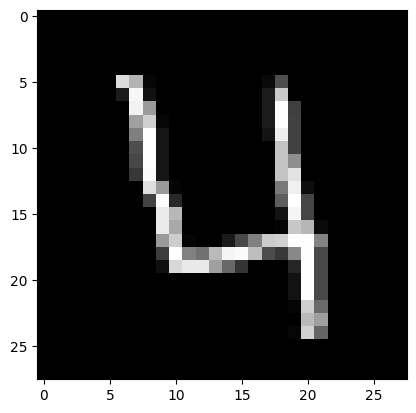

In [5]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 3
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(),(28,28))
plt.imshow(image_data, cmap = "gray")

In [6]:
features

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 '

Break the data into Images and Labels

In [7]:
x = train.iloc[:,1:]
y = train['label']

In [8]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train Test Split of Images

In [9]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123 )

In [10]:
per = Perceptron(verbose = 2)
per.fit(x_train,y_train)
per_preds_train = per.predict(x_train)
per_preds_test = per.predict(x_test)

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

In [3]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual, predicted)
  acc_score = accuracy_score(actual, predicted)
  print("The model accuracy is: ", acc_score)
  print(conf_matrix)
  print(clas_rep)

In [12]:
model_eval(y_train,per_preds_train)

The model accuracy is:  0.8858333333333334
[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93    

Multi layer Perceptron

In [19]:
mlp = MLPClassifier(hidden_layer_sizes = (16,16,16), verbose = True)

In [20]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 4.30935443
Iteration 2, loss = 1.56700528
Iteration 3, loss = 1.20602526
Iteration 4, loss = 0.89781453
Iteration 5, loss = 0.73069532
Iteration 6, loss = 0.63613692
Iteration 7, loss = 0.56300380
Iteration 8, loss = 0.50886918
Iteration 9, loss = 0.46842120
Iteration 10, loss = 0.43210393
Iteration 11, loss = 0.40826127
Iteration 12, loss = 0.38586368
Iteration 13, loss = 0.36693653
Iteration 14, loss = 0.35231145
Iteration 15, loss = 0.33806958
Iteration 16, loss = 0.32432618
Iteration 17, loss = 0.31773524
Iteration 18, loss = 0.30555399
Iteration 19, loss = 0.29313719
Iteration 20, loss = 0.28137360
Iteration 21, loss = 0.26973006
Iteration 22, loss = 0.26557538
Iteration 23, loss = 0.26050484
Iteration 24, loss = 0.25538465
Iteration 25, loss = 0.24806150
Iteration 26, loss = 0.24332182
Iteration 27, loss = 0.24072519
Iteration 28, loss = 0.23801890
Iteration 29, loss = 0.23170076
Iteration 30, loss = 0.22558934
Iteration 31, loss = 0.22384682
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 16, 16), verbose=True)

In [21]:
preds_mlp_train = mlp.predict(x_train)
preds_mlp_test = mlp.predict(x_test)

In [22]:
model_eval(y_train, preds_mlp_train)

The model accuracy is:  0.9761607142857143
[[3293    0    3    0    4    0   22    0   25    0]
 [   1 3715    4    0    0    0    0    1   13    1]
 [  20    1 3235   28    3    6    9    7   29    1]
 [  13    1   52 3328    2   29    4    3   28   33]
 [   9    0    0    0 3208    0   16    1    1   41]
 [  10    0    5   26    6 2904   18    1   11   14]
 [  25    0    2    0    4    5 3226    0    5    0]
 [   2    4   11    1    7    1    0 3487    0   28]
 [   6    2   14   34    6   18    9    1 3143   13]
 [   5    2    0   20   48    6    1    9   10 3260]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3347
           1       1.00      0.99      1.00      3735
           2       0.97      0.97      0.97      3339
           3       0.97      0.95      0.96      3493
           4       0.98      0.98      0.98      3276
           5       0.98      0.97      0.97      2995
           6       0.98      0.99      0.98    

In [23]:
model_eval(y_test, preds_mlp_test)

The model accuracy is:  0.9297619047619048
[[760   0   5   2   3   4   8   0   3   0]
 [  0 925   6   3   2   1   1   1   6   4]
 [  4   4 774  15   7   4   8   8  13   1]
 [  6   2  23 772   3  25   1   7   9  10]
 [  2   5   2   0 742   3   6   3   5  28]
 [  5   4   6  27   2 720  12   0  16   8]
 [ 12   1   4   0   7  12 827   0   6   1]
 [  3   5  12   3   2   3   1 800   3  28]
 [  4   6   9  20   5  11   6   3 740  13]
 [  3   0   1   4  33   7   1  22   6 750]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       785
           1       0.97      0.97      0.97       949
           2       0.92      0.92      0.92       838
           3       0.91      0.90      0.91       858
           4       0.92      0.93      0.93       796
           5       0.91      0.90      0.91       800
           6       0.95      0.95      0.95       870
           7       0.95      0.93      0.94       860
           8       0.92      0.91      

# Keras Implementation

Approach to creating models in Keras

1.   Initializing a model
     1. Sequential Model (Sequence of Layers)
     2. Functional Model (Multi modal, Transfer Learning)
2.   Set up the layers
     1. Dense Layers, Fully Connected Layers, MLP
     2. Dropout (Avoids overfitting)
3.   Compilation
     1. Optimizer (SGD, ADAM)
     2. Loss Function (Regression Loss Functions, Classification Loss Func)
     3. Metrics (Accuracy)
4.   Model Fit
     1. X & Y (Train and Test)
     2. Epochs (Number of iterations)
     3. Batch_Size = 128, 256 - Batch of images



In [4]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (784,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
